In [2]:
import os

os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

In [3]:
import sys
sys.path.append('..')

from datetime import datetime

import pandas as pd
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow
from bizdays import Calendar, set_option

import brasa

man = brasa.CacheManager()

In [4]:
ds_intra = brasa.get_dataset("b3-trades-intraday")

In [5]:
ds_intra.count_rows()

1108383861

In [6]:
ds_intra.schema

refdate: timestamp[us]
symbol: string
update_action: int64
traded_price: double
traded_quantity: int64
trade_time: string
trade_id: int64
trade_session_id: int64
trade_date: timestamp[us]
buyer_code: int64
seller_code: int64
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 1673

In [ ]:
symbols_tb = ds_intra.to_table(columns=["symbol"])


In [ ]:
symbols_tb.column("symbol").unique()

[
  "WSPU23",
  "SJCF24C002550",
  "SJCF24C002950",
  "CCMU23C005900",
  "SJCX23P002300",
  "DI1F31",
  "BGIK23",
  "DI1F29",
  "DI1F26",
  "DI1F27",
  ...
  "COGNM385",
  "ALOSK260",
  "ARZZA580",
  "BMOBL135",
  "IRBRM400",
  "EMBRW187",
  "AAPLW426",
  "BEEFB850",
  "EZTCM156",
  "RECVW180"
]

In [8]:
df_intra = ds_intra.to_table().to_pandas()
df_intra["time"] = pd.to_datetime(df_intra["trade_date"].dt.strftime("%Y-%m-%d") + df_intra["trade_time"], format="%Y-%m-%d%H%M%S%f")

ArrowMemoryError: malloc of size 33554432 failed

In [6]:
ds_intra.filter(pc.field("symbol") == "WINQ23").filter(pc.field("refdate") == datetime(2023, 8, 16)).count_rows()

485148

In [7]:
df_winq23 = ds_intra.filter(pc.field("symbol") == "WINQ23").filter(pc.field("refdate") == datetime(2023, 8, 15)).to_table().to_pandas()
df_winv23 = ds_intra.filter(pc.field("symbol") == "WINV23").filter(pc.field("refdate") == datetime(2023, 8, 16)).to_table().to_pandas()

In [8]:
df_win = pd.concat([df_winq23, df_winv23])

In [9]:
df_win

,refdate,symbol,update_action,traded_price,traded_quantity,trade_time,trade_id,trade_session_id,trade_date,buyer_code,seller_code
0,2023-08-15,WINQ23,0,116070.0,1,090041257,10,1,2023-08-15,120,88
1,2023-08-15,WINQ23,0,116070.0,17,090041257,20,1,2023-08-15,120,88
2,2023-08-15,WINQ23,0,116070.0,2,090041257,30,1,2023-08-15,3,88
3,2023-08-15,WINQ23,0,116070.0,42,090041257,40,1,2023-08-15,15,88
4,2023-08-15,WINQ23,0,116070.0,1,090041257,50,1,2023-08-15,85,88
...,...,...,...,...,...,...,...,...,...,...,...
4875245,2023-08-16,WINV23,0,117820.0,2,180128633,48765820,1,2023-08-16,3,16
4875246,2023-08-16,WINV23,0,117820.0,1,180128633,48765830,1,2023-08-16,3,16
4875247,2023-08-16,WINV23,0,117820.0,1,180128633,48765840,1,2023-08-16,90,16
4875248,2023-08-16,WINV23,0,117820.0,10,180128633,48765850,1,2023-08-16,1982,16


In [14]:
df_win["trade_date"].dt.strftime("%Y-%m-%d")

0          2023-08-15
1          2023-08-15
2          2023-08-15
3          2023-08-15
4          2023-08-15
              ...    
4875245    2023-08-16
4875246    2023-08-16
4875247    2023-08-16
4875248    2023-08-16
4875249    2023-08-16
Name: trade_date, Length: 10147838, dtype: object

In [16]:
df_win["time"] = pd.to_datetime(df_win["trade_date"].dt.strftime("%Y-%m-%d") + df_win["trade_time"], format="%Y-%m-%d%H%M%S%f")

<Axes: xlabel='time'>

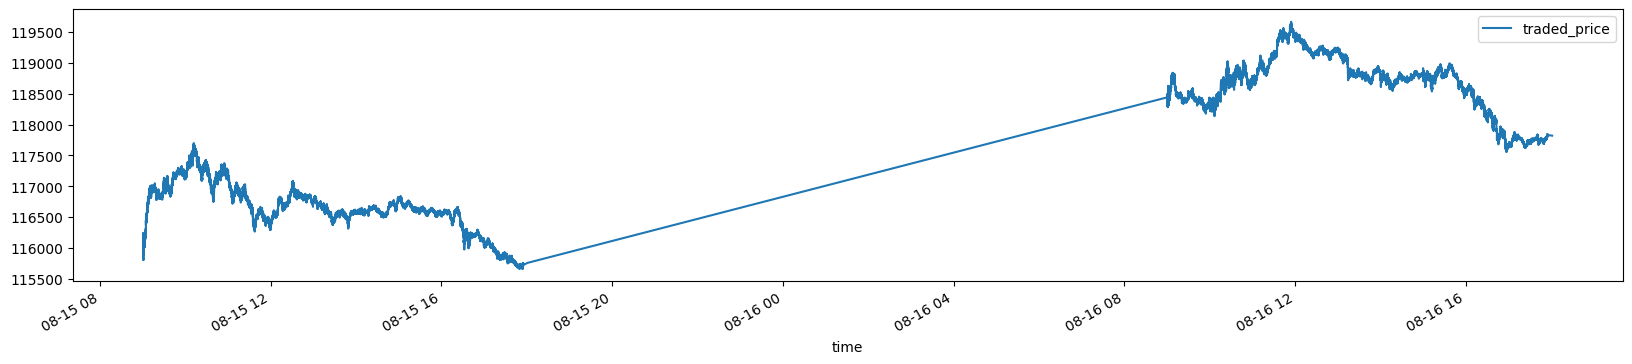

In [18]:
df_win.plot(x="time", y="traded_price", figsize=(20, 4))

<Axes: xlabel='trade_time'>

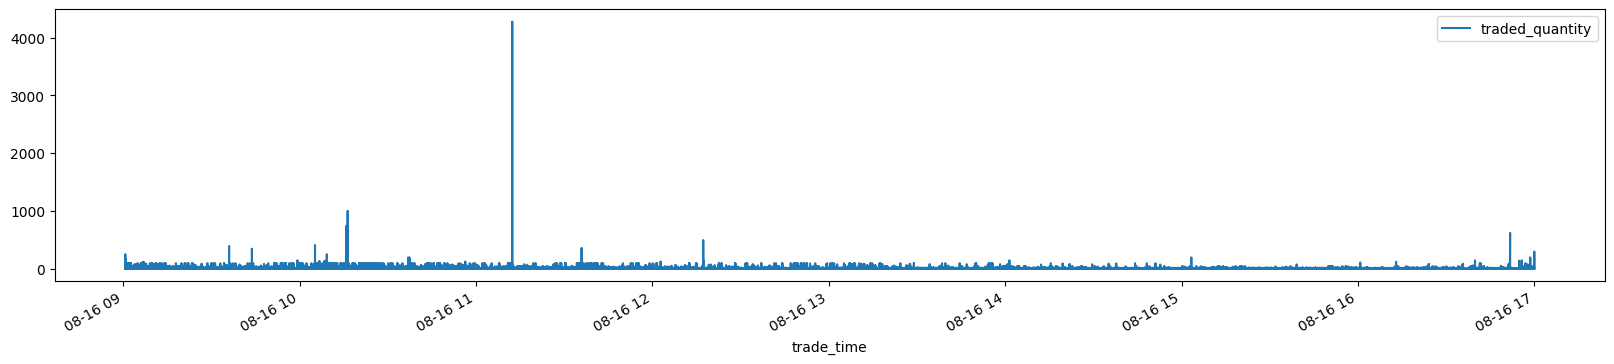

In [31]:
df_win.plot(x="time", y="traded_quantity", figsize=(20, 4))

<Axes: xlabel='traded_quantity'>

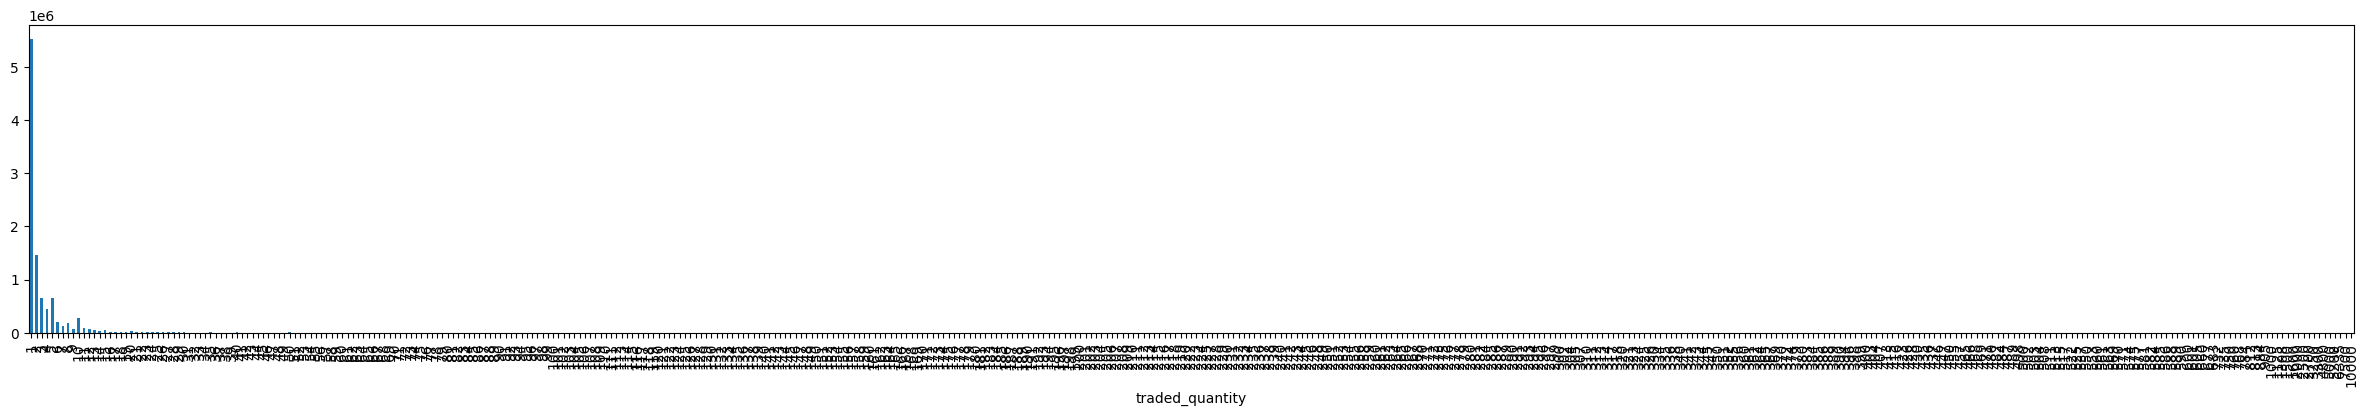

In [21]:
import numpy as np
df_win["traded_quantity"].value_counts().sort_index().plot(kind="bar", figsize=(30, 4))

In [25]:
import matplotlib 
matplotlib.rc('xtick', labelsize=6) 
matplotlib.rc('ytick', labelsize=6) 

<Axes: xlabel='traded_quantity'>

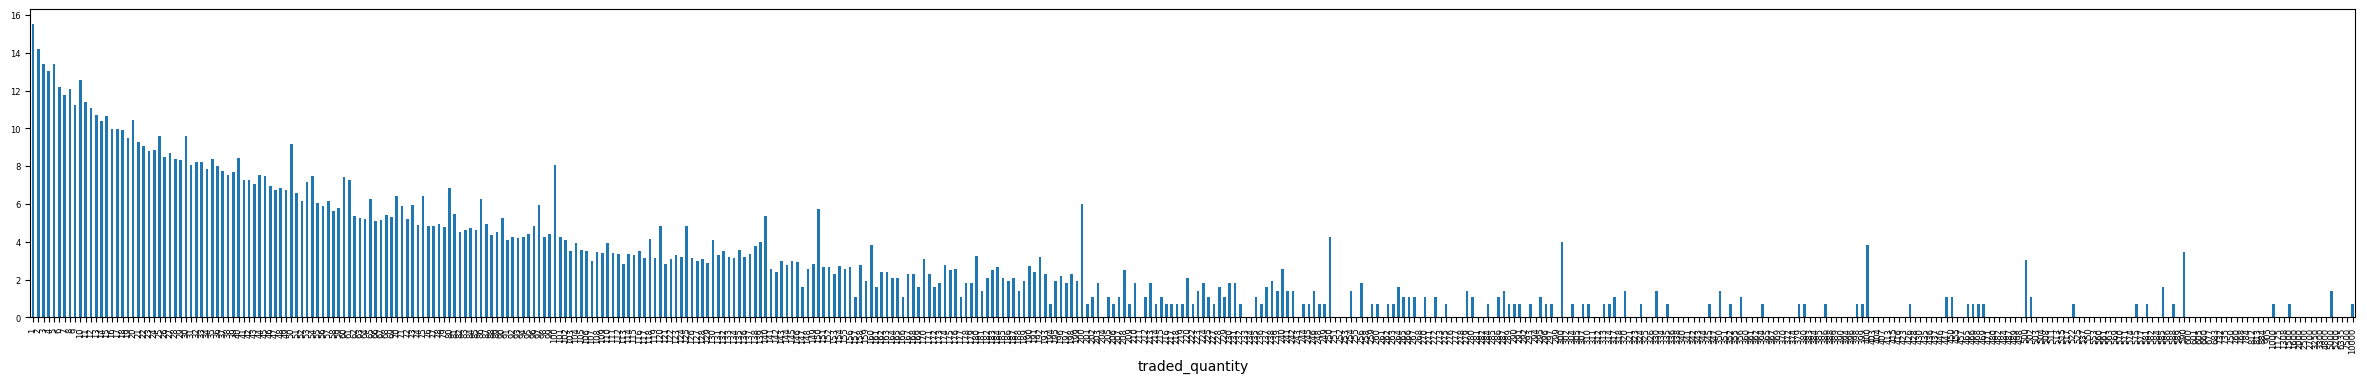

In [26]:
np.log(df_win["traded_quantity"].value_counts().sort_index()).plot(kind="bar", figsize=(30, 4))

<Axes: xlabel='time'>

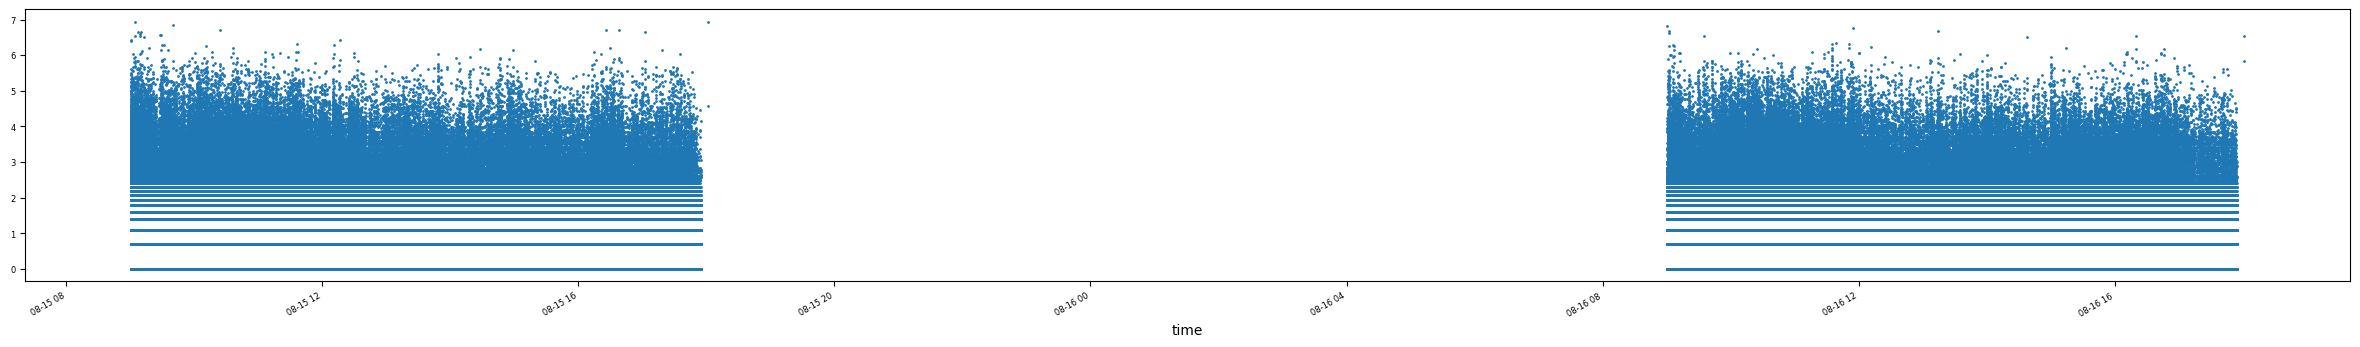

In [29]:
np.log(df_win["time"].value_counts()).plot(style=".", markersize=2, figsize=(30, 4))